In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


In [3]:
print("First 5 samples:")
for i in range(5):
    print(f"{X[i]} -> {iris.target_names[y[i]]}")
print()


First 5 samples:
[5.1 3.5 1.4 0.2] -> setosa
[4.9 3.  1.4 0.2] -> setosa
[4.7 3.2 1.3 0.2] -> setosa
[4.6 3.1 1.5 0.2] -> setosa
[5.  3.6 1.4 0.2] -> setosa



In [4]:
plot_colors = "ryb"
plot_step = 0.02
pairs = list(combinations(range(X.shape[1]), 2))

In [6]:
plt.figure(figsize=(15, 10))
for i, pair in enumerate(pairs):
    X_pair = X[:, pair]

<Figure size 1500x1000 with 0 Axes>

In [7]:
    clf = DecisionTreeClassifier().fit(X_pair, y)

In [8]:
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1

In [9]:
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

In [11]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

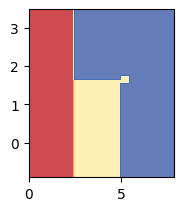

In [12]:
plt.subplot(2, 3, i + 1)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)

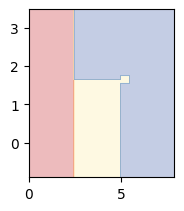

In [13]:
    plt.subplot(2, 3, i + 1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)

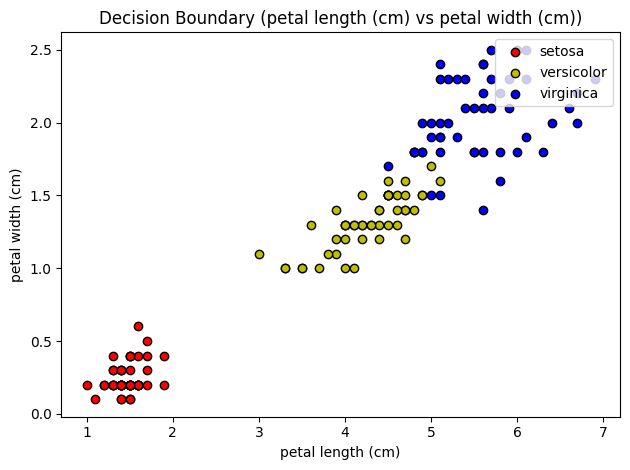

In [17]:
    for j, color in zip(range(3), plot_colors):
        plt.scatter(X_pair[y == j, 0], X_pair[y == j, 1],
                    label=iris.target_names[j],
                    c=color, edgecolor='k')

    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])
    plt.title(f"Decision Boundary ({feature_names[pair[0]]} vs {feature_names[pair[1]]})")
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [18]:
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X, y)

DecisionTreeClassifier(random_state=42)

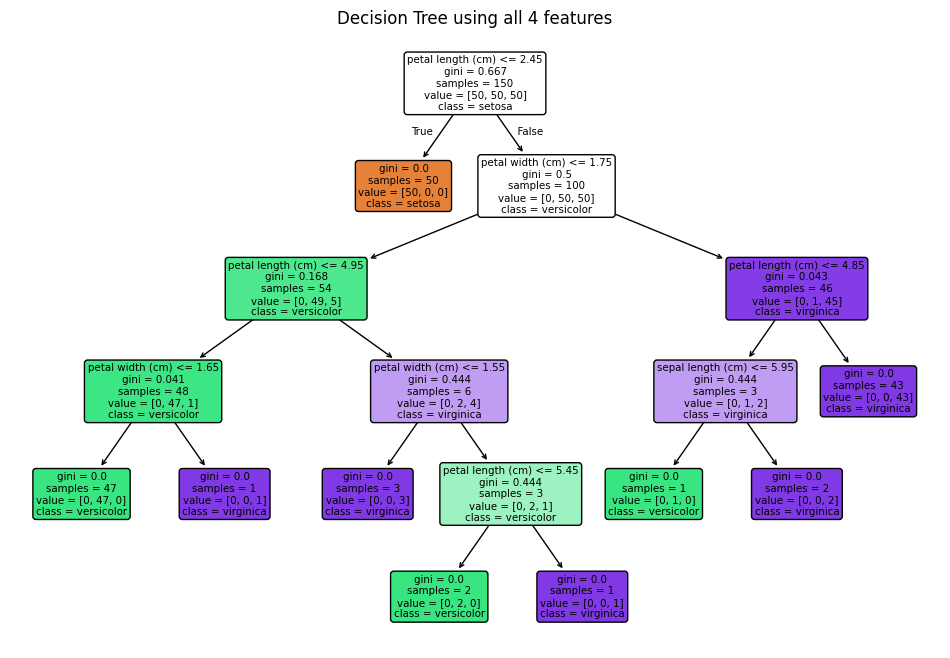

In [21]:
plt.figure(figsize=(12, 8))
plot_tree(clf_full, feature_names=feature_names,
          class_names=target_names, filled=True, rounded=True)
plt.title("Decision Tree using all 4 features")
plt.show()